In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




from joblib import parallel_backend

# # Set the temporary directory to the external hard drive
# import os
# os.environ['JOBLIB_TEMP_FOLDER'] = '/Volumes/Valentin\'s LaCie/pythontemp'

# # Ensure the directory exists
# os.makedirs(os.environ['JOBLIB_TEMP_FOLDER'], exist_ok=True)






data = pd.read_csv(
        filepath_or_buffer="/Users/valentin/Desktop/Foundations of Data Science/FoDS_G05_CvD/data/2025_cardio_train.csv",
        index_col=0,
        na_filter=False,
        dtype = {"gender": "category",
                 "cholesterol": "category",
                 "gluc": "category",
                 "smoke": "category",
                 "alco": "category",
                 "active": "category",
                 "cardio": "category",
        }
)

data["cholesterol"] = data["cholesterol"].cat.as_ordered()
data["gluc"] = data["gluc"].cat.as_ordered()

#outlier removal
data_clone = data.copy()
data = data[data["ap_hi"] <= 200 ]
data = data[data["ap_hi"] >= 0]
data = data[data["ap_lo"] <= 200]
data = data[data["ap_lo"] >= 0]

#one hot encoding
data_encoded = pd.get_dummies(data, drop_first=True, )

#train test split
X = data_encoded.drop("cardio_1", axis=1)
y = data_encoded["cardio_1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Standardization and scaling
# Create a pipeline with StandardScaler and RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features 
    ('rf', RandomForestClassifier (criterion='gini', max_depth=None, random_state = 42))  # Step 2: Apply Random Forest, criterion is gini or entropy
])

# Train the Random Forest model
pipe.fit(X_train, y_train)

# Make predictions
rf_y_pred = pipe.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")

print(pipe[1].get_params())#

####################
# with hyperparameter tuning
####################
# Define the parameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [100, 200, 300], # Number of trees in the forest
    'rf__max_depth': [10, None, 20, 30], # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'rf__criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

param_grid = {
    'rf__n_estimators': [200], # Number of trees in the forest
    'rf__max_depth': [20], # Maximum depth of the tree
    'rf__min_samples_split': [10],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [4], # Minimum number of samples required to be at a leaf node
    'rf__criterion': ['entropy'] # Function to measure the quality of a split
}




Random Forest Classifier Accuracy: 0.71
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [23]:

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_ # Get the best estimator and it uses the best parameters
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Create a new pipeline with the best estimator
pipe = Pipeline([
('scaler', StandardScaler()),  # Step 1: Standardize the features
('rf', best_estimator)  # Step 2: Apply Random Forest with best parameters
])

# Train the Random Forest model
pipe.fit(X_train, y_train)

# Make predictions
rf_y_pred = pipe.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Classifier Accuracy after Hyperparameter Tuning: {rf_accuracy:.2f}")



from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_y_pred))



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV] END rf__criterion=entropy, rf__max_depth=20, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=200; total time=  15.9s
[CV] END rf__criterion=entropy, rf__max_depth=20, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=200; total time=  15.7s
[CV] END rf__criterion=entropy, rf__max_depth=20, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=200; total time=  15.7s
[CV] END rf__criterion=entropy, rf__max_depth=20, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=200; total time=  15.6s
[CV] END rf__criterion=entropy, rf__max_depth=20, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=200; total time=  14.9s
Best Parameters: {'rf__criterion': 'entropy', 'rf__max_depth': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', m

6895
6895
[[2746  742]
 [1129 2278]]


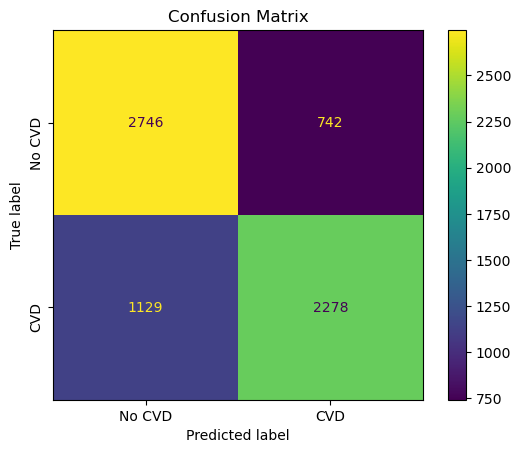

In [31]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


    
print(len(rf_y_pred))
print(len(y_test))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, rf_y_pred),
    display_labels=["No CVD", "CVD"])
# disp.ax_.set_title("Hello")

print(disp.confusion_matrix)
disp.plot()
plt.title("Confusion Matrix")

# Rotate the y-axis labels to vertical
plt.xticks(rotation=0)
plt.yticks(rotation=90)

plt.show()